<a href="https://colab.research.google.com/github/shawnchen63/DA_dahazing/blob/master/Domain_Adaptation_for_Low_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### START Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!git clone https://github.com/shawnchen63/DA_dahazing.git

Cloning into 'DA_dahazing'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 14217 (delta 18), reused 14 (delta 3), pack-reused 14178
Receiving objects: 100% (14217/14217), 867.38 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [ ]:
%cd /content/DA_dahazing/
!git pull

/content/DA_dahazing
Already up to date.


In [ ]:
!pip install -r requirements.txt

In [ ]:
%cd /content/

/content


In [ ]:
!rm -r /content/DA_dahazing/datasets/dehazing/

In [ ]:
!unzip -q drive/My\ Drive/Input_.zip -d DA_dahazing/datasets/dehazing/
!mv DA_dahazing/datasets/dehazing/Input/ DA_dahazing/datasets/dehazing/train_a

In [ ]:
!mkdir DA_dahazing/datasets/dehazing/train_b

In [ ]:
!gdown https://drive.google.com/uc?id=1cW0B3S2KqCEoS25OD1DcViEl4IbmV6tM

Downloading...
From: https://drive.google.com/uc?id=1cW0B3S2KqCEoS25OD1DcViEl4IbmV6tM
To: /content/expertC.zip
3.42GB [01:13, 46.2MB/s]


In [ ]:
!unzip -q expertC.zip -d expertC/

In [ ]:
import shutil
import os

for file in os.listdir('DA_dahazing/datasets/dehazing/train_a/'):
  shutil.move('/content/expertC/'+file, 'DA_dahazing/datasets/dehazing/train_b/'+file)

In [ ]:
!unzip -q drive/My\ Drive/unlabeled.zip -d  DA_dahazing/datasets/dehazing/unlabeled_/

In [ ]:
!mv /content/DA_dahazing/datasets/dehazing/unlabeled_/content/unlabeled/ /content/DA_dahazing/datasets/dehazing/unlabeled
!rm -r DA_dahazing/datasets/dehazing/unlabeled_/

In [ ]:
%cd /content/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('python3 -m pip install visdom')
get_ipython().system_raw('python3 -m visdom.server -port 6007 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('./ngrok http 6007 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

/content
--2020-07-20 02:41:37--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.215.14.117, 3.212.40.153, 52.6.123.150, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.215.14.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  17.1MB/s    in 0.8s    

2020-07-20 02:41:38 (17.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://8afa84f8054a.ngrok.io


In [ ]:
%cd /content/DA_dahazing/
!python train.py --dataroot ./datasets/dehazing --name run_cyclegan --learn_residual --resize_or_crop crop --print_freq 400 --display_port 6006 --lr 0.0002 --which_model_netG_A resnet_9blocks --which_model_netG resnet_9blocks --lambda_A 1 --lambda_B 1 --lambda_identity 0.1   --niter 90 --niter_decay 0 --fineSize 256 --no_html --batchSize 4  --gpu_id 0 --update_ratio 1 --unlabel_decay 0.99 --model cyclegan --checkpoints_dir /content/drive/My\ Drive/fyp/da_checkpoints

In [ ]:
%cd /content/
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('python3 -m pip install visdom')
get_ipython().system_raw('python3 -m visdom.server -port 6007 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('./ngrok http 6007 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
%cd /content/DA_dahazing/
!python train.py  --dataroot ./datasets/dehazing --name run_fr_depth --lambda_Dehazing 10 --lambda_Dehazing_DC 1e-2 --lambda_Dehazing_TV 1e-2 --learn_residual --resize_or_crop crop --lr 0.0002 --display_freq 100 --print_freq 400 --display_port 6007  --epoch_count 1 --niter 20 --niter_decay 0 --fineSize 256 --no_html --batchSize 4   --gpu_id 0 --update_ratio 1 --unlabel_decay 0.99 --save_epoch_freq 5 --model RDehazingnet --g_s2r_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netG_A.pth --checkpoints_dir /content/drive/My\ Drive/fyp/da_checkpoints

In [ ]:
%cd /content/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('python3 -m pip install visdom')
get_ipython().system_raw('python3 -m visdom.server -port 6008 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('./ngrok http 6008 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
%cd /content/DA_dahazing/
!python train.py  --dataroot ./datasets/dehazing --name run_fs_depth --lambda_Dehazing 10 --lambda_Dehazing_DC 1e-2 --lambda_Dehazing_TV 1e-2 --learn_residual --resize_or_crop crop --lr 0.0002 --display_freq 100 --print_freq 400 --display_port 6008  --epoch_count 1 --niter 20 --niter_decay 0 --fineSize 256 --no_html --batchSize 4   --gpu_id 0 --update_ratio 1 --unlabel_decay 0.99 --save_epoch_freq 5 --model SDehazingnet --g_r2s_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netG_B.pth --checkpoints_dir /content/drive/My\ Drive/fyp/da_checkpoints

In [ ]:
%cd /content/DA_dahazing/
!python train.py  --dataroot ./datasets/dehazing --name run_danet_depth --epoch_count 1 --niter 20 --lambda_S 1 --lambda_R 1 --lambda_identity 0.1 --lambda_Dehazing 10 --lambda_Dehazing_Con 0.1 --lambda_Dehazing_DC 1e-2 --lambda_Dehazing_TV 1e-3 --learn_residual --resize_or_crop crop --display_freq 100 --print_freq 500 --display_port 6007 --niter_decay 0 --fineSize 256 --no_html --batchSize 4   --gpu_id 0 --update_ratio 1 --unlabel_decay 0.99 --save_epoch_freq 5 --model danet --S_Dehazing_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_fs_depth/latest_netS_Dehazing.pth --R_Dehazing_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_fr_depth/latest_netR_Dehazing.pth --g_s2r_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netG_A.pth --g_r2s_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netG_B.pth --d_r_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netD_A.pth --d_s_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_cyclegan/latest_netD_B.pth --checkpoints_dir /content/drive/My\ Drive/fyp/da_checkpoints/

In [ ]:
%cd /content/
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('python3 -m pip install visdom')
get_ipython().system_raw('python3 -m visdom.server -port 6009 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('./ngrok http 6009 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
%cd /content/DA_dahazing/
!python test.py --dataroot ./datasets/dehazing --name run_test --learn_residual --resize_or_crop crop --display_port 6009 --which_model_netG resnet_9blocks  --batchSize 1 --gpu_id 0 --model SDehazingnet --S_Dehazing_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_danet_depth/latest_netS_Dehazing.pth --checkpoints_dir /content/drive/My\ Drive/fyp/da_results/synthetic --results_dir /content/drive/My\ Drive/fyp/da_results/synthetic --how_many 100

In [ ]:
%cd /content/
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('python3 -m pip install visdom')
get_ipython().system_raw('python3 -m visdom.server -port 6010 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('./ngrok http 6010 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
%cd /content/DA_dahazing/
!python test.py --dataroot ./datasets/dehazing --name run_test --learn_residual --resize_or_crop crop --display_port 6010 --which_model_netG resnet_9blocks  --batchSize 1 --gpu_id 0 --model RDehazingnet --R_Dehazing_premodel /content/drive/My\ Drive/fyp/da_checkpoints/run_danet_depth/latest_netR_Dehazing.pth --checkpoints_dir /content/drive/My\ Drive/fyp/da_results/real --results_dir /content/drive/My\ Drive/fyp/da_results/real --how_many 100

## Some notes

Experiment is trained with a Tesla K80 GPU on Google Colab. Due to time constraints of Google Colab, only 20 epochs were run for each part of the network (4 parts in total) as each epoch takes 30 mins to train. Therefore, performance could be improved with more training. This exercise is thus meant to be part of an initial exploration phase.

![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/7c7b46ac41f12074e5cdd7187efbaa33f8eab6b4/4-Figure2-1.png)

The original paper uses Domain Adaptation to remove haze from images. Likewise, we can use a similar idea to enhance low light images instead. In this exercise, MIT Adobe 5K images were used as paired training set. We will use `original` to denote the input images in that dataset, `ground truth` as images that were adjusted by experts to improve image quality and `da_adjusted` images are the results of using domain adaptation on the `original` images.

Unlabeled images are also needed for training and evaluation. The NATURAL NIGHT-TIME IMAGE DATABASE(NNID) were used as the unlabeled and unpaired image. 

## Visual Evaluation

Plot Training Images First

In [ ]:
import os

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

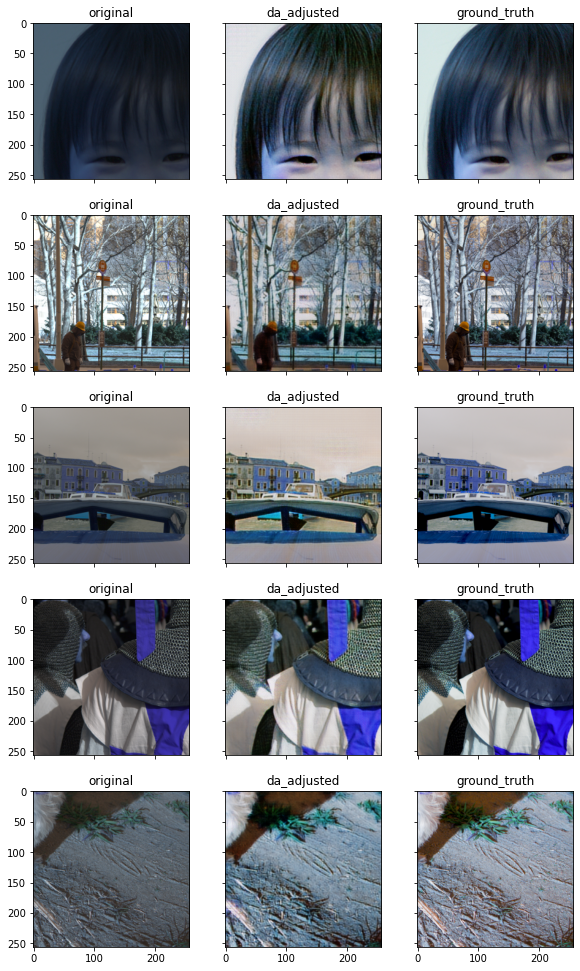

In [ ]:
num_img = 5
images_list = []
results_path = '/content/drive/My Drive/fyp/da_results/synthetic/'
path_list = os.listdir(results_path)
path_list.sort()

choices = np.random.choice(len(path_list)//3, num_img, replace=False)

for i in range(num_img):

  adj_image = path_list[choices[i]]
  file_name = adj_image.split('adj_')[1]
  
  images_list.append(cv2.imread(os.path.join(results_path,'ori_'+file_name)))
  images_list.append(cv2.imread(os.path.join(results_path,adj_image)))
  images_list.append(cv2.imread(os.path.join(results_path,'truth_'+file_name)))

fig = plt.figure(figsize=(12., 17.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_img, 3),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
titles = ['original', 'da_adjusted', 'ground_truth']
count = 0
for ax, im in zip(grid, images_list):
  # Iterating over the grid returns the Axes.
  ax.imshow(im)
  ax.set_title(titles[count%3])
  count+=1

plt.show()

Unlabelled

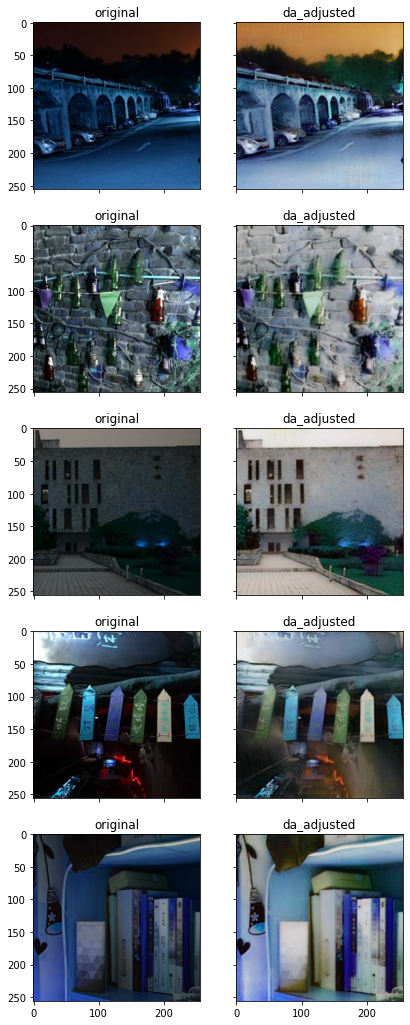

In [ ]:
num_img = 5
images_list = []
results_path = '/content/drive/My Drive/fyp/da_results/real/'
path_list = os.listdir(results_path)
path_list.sort()

choices = np.random.choice(len(path_list)//2, num_img, replace=False)

for i in range(num_img):

  adj_image = path_list[choices[i]]
  file_name = adj_image.split('adj_')[1]
  
  images_list.append(cv2.imread(os.path.join(results_path,'ori_'+file_name)))
  images_list.append(cv2.imread(os.path.join(results_path,adj_image)))

fig = plt.figure(figsize=(12., 18.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_img, 2),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
titles = ['original', 'da_adjusted']
count = 0
for ax, im in zip(grid, images_list):
  # Iterating over the grid returns the Axes.
  ax.imshow(im)
  ax.set_title(titles[count%2])
  count+=1

plt.show()

Future work: To evaluate images based on metrics such as PSNR, SSIM, Perception Index, etc